In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("data.csv")
data = data[['sample','cfu_per_ug']]

In [26]:
data['cfu_per_ug'] = data['cfu_per_ug'].replace(0,1)

In [27]:
data['sample'] = data['sample'].replace('pir-116, pUC','pir-116 \n pHSG299')
data['sample'] = data['sample'].replace('DH10B, A01','DH10B \n Phagemid')
data['sample'] = data['sample'].replace('pir-116, A01','pir-116 \n Phagemid')
data['sample'] = data['sample'].replace('DH10B, pUC','DH10B \n pHSG299')

In [28]:
data_summary = data.groupby('sample').agg(mean_value=('cfu_per_ug', 'mean'), std_value=('cfu_per_ug', 'std')).reset_index()

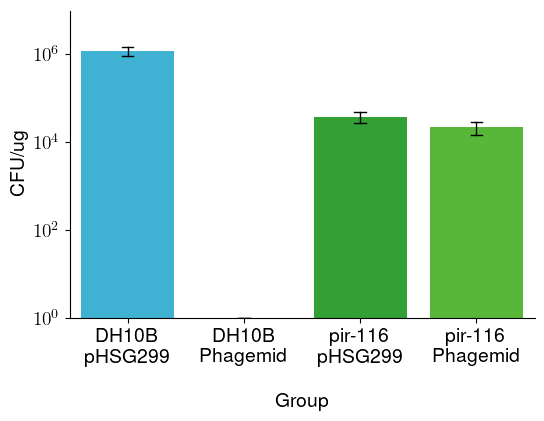

In [33]:
custom_colors = ['#26bfed', '#FFFFFF', '#20b224', '#4dcc23']

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(6, 4))
plt.rcParams['text.usetex'] = True
plt.rcParams['svg.fonttype'] = 'none'

sns.barplot(x='sample', y='cfu_per_ug', data=data, ci='sd', capsize=.1, 
            errwidth=1.0, errcolor='black', 
            order = ['DH10B \n pHSG299','DH10B \n Phagemid','pir-116 \n pHSG299','pir-116 \n Phagemid'], palette=custom_colors)
plt.yscale('log')
plt.ylim([1,1E7])

ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
    
plt.xlabel('\n Group')
plt.ylabel('CFU/ug')

plt.savefig('replicability_results.pdf')
plt.show()